# Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks


https://arxiv.org/pdf/1908.10084.pdf

# 요약

BERT(Devlin et al., 2018)과 RoBERTa(Liu et al., 2019)는 시맨틱 텍스트 유사도(STS)와 같은 문장 쌍 회귀 작업에서 새로운 최고 성능을 달성했습니다. 그러나 두 문장을 네트워크에 모두 입력해야 한다는 점으로 인해 엄청난 계산 부하가 발생합니다. 예를 들어, 10,000개의 문장으로 구성된 컬렉션에서 가장 유사한 쌍을 찾으려면 BERT를 사용하여 약 5천만 회의 추론 계산(약 65시간)이 필요합니다. 또한 BERT의 구조로 인해 시맨틱 유사성 검색이나 비지도 학습 작업인 클러스터링에 적합하지 않습니다.

이 논문에서는 Sentence-BERT(SBERT)를 제안합니다. SBERT는 사전 훈련된 BERT 네트워크를 수정한 것으로, 시멘틱하게 의미 있는 문장 임베딩을 생성하기 위해 쌍둥이(siamese) 및 삼둥이(triplet) 네트워크 구조를 사용합니다. 이러한 임베딩은 코사인 유사도를 사용하여 비교할 수 있습니다. 이로 인해 BERT / RoBERTa로 65시간이 걸리던 가장 유사한 쌍 찾기 작업이 SBERT로는 약 5초만에 수행될 수 있게 되었으며, BERT의 정확도를 유지한 채로 이루어집니다.

이 논문에서는 SBERT와 SRoBERTa를 일반적인 STS 작업과 전이 학습 작업에서 평가하였으며, 다른 최첨단 문장 임베딩 방법보다 우수한 성능을 보였습니다.

# Related Work

이 논문은 Sentence-BERT(SBERT)를 제안합니다. SBERT는 BERT 네트워크를 수정한 것으로, 쌍둥이(siamese)와 삼둥이(triplet) 네트워크를 활용하여 의미 있는 문장 임베딩을 생성할 수 있습니다. 이로 인해 BERT로는 적용되지 않았던 새로운 작업들을 수행할 수 있게 되었습니다. 이 작업들은 대규모 의미론적 유사성 비교, 클러스터링, 그리고 의미론적 검색을 포함합니다.

BERT는 다양한 문장 분류 및 문장 쌍 회귀 작업에서 최고의 성능을 보여주었습니다. 그러나 너무 많은 조합 가능성으로 인해 다양한 쌍 회귀 작업에는 적합하지 않습니다. 예를 들어, 10,000개의 문장으로 구성된 컬렉션에서 가장 유사한 쌍을 찾으려면 BERT로 약 5천만 회의 추론 계산(약 65시간)이 필요합니다.

SBERT는 고정 크기의 문장 벡터를 생성할 수 있게 하는 쌍둥이 네트워크 구조를 활용합니다. 코사인 유사도나 맨해튼 / 유클리드 거리와 같은 유사성 측정 방법을 사용하여 의미론적으로 유사한 문장을 찾을 수 있습니다. 이러한 유사성 측정은 현대 하드웨어에서 매우 효율적으로 수행되어, SBERT는 의미론적 유사성 검색 및 클러스터링에 사용할 수 있습니다. 또한 최대 40만 개의 Quora 질문 중 새로운 질문과 가장 유사한 것을 찾는 작업을 BERT로 대응한다면 하나의 질문에 대한 답변을 얻기 위해 50시간 이상이 소요됩니다. 하지만 SBERT를 사용하면 이를 몇 밀리초 안에 해결할 수 있습니다.


Model


Classification Objective Function.


Regression Objective Function.


Triplet Objective Function.


Training Details


Evaluation - STS


Unsupervised STS


Supervised STS


Argument Facet Similarity


Wikipedia Sections Distinction


Evaluation - SentEval


Ablation Study

Computational Efficiency

# 모델

BERT는 사전 훈련된 transformer 네트워크로 다양한 자연어 처리(NLP) 작업에서 최고 성능을 보여줍니다. 하지만 BERT의 단점은 문장 간의 독립적인 임베딩을 계산하지 않기 때문에 문장 임베딩을 얻는 것이 어려웠습니다.

BERT 네트워크 구조의 큰 단점은 각 문장에 대해 독립적인 문장 임베딩이 계산되지 않는다는 것입니다. 이로 인해 BERT로부터 문장 임베딩을 얻는 것이 어려워집니다. 이러한 제한을 우회하기 위해 연구자들은 단일 문장을 BERT를 통해 통과시킨 다음, 출력을 평균 내는 방법(평균 단어 임베딩과 유사)이나 특별한 CLS 토큰의 출력을 사용하여 고정 크기의 벡터를 얻었습니다.

이를 극복하기 위해 연구자들은 BERT에 단일 문장을 입력한 후 출력을 평균화하거나 특별한 CLS 토큰의 출력을 사용하여 문장 임베딩을 얻었습니다.

SBERT는 BERT 또는 RoBERTa의 출력에 pooling 작업을 추가하여 고정 크기의 문장 임베딩을 얻습니다. 평균 전략(MEAN-strategy)과 최대 전략(MAX-strategy) 등 3가지 pooling 전략을 실험하며, 기본 구성은 평균 전략입니다.

BERT 또는 RoBERTa를 fine-tuning하기 위해 쌍둥이(siamese)와 삼둥이(triplet) 네트워크를 생성하여 문장 임베딩을 의미 있게 업데이트하고 코사인 유사도를 사용하여 비교할 수 있도록 합니다. fine-tuning에는 분류, 회귀, 그리고 삼둥이 손실 함수를 사용하여 실험합니다. 분류 손실 함수는 cross-entropy loss를 사용하고, 회귀 손실 함수는 mean-squared-error loss를 사용합니다. 삼둥이 손실 함수는 삼중 조건을 이용하여 네트워크를 튜닝합니다.

이러한 방법들을 통해 SBERT는 문장 간 유사성 측정에 사용되며, 여러 NLP 작업에서 뛰어난 성능을 보입니다.

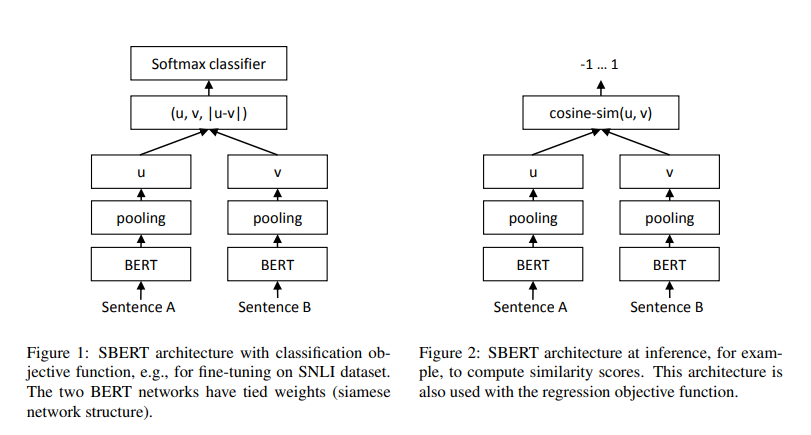

1) Classification Objective Function.

 우리는 u와 v를 포함하는 문장을 요소별 차이인 "u-v"와 연결하고 훈련 가능한 무게와 곱합니다 Wt∈R^(3n∗k):


o=softmax(Wt(u,v,∣u−v∣))


여기서 n은 문장 임베딩의 차원이고 k는 레이블의 수입니다. 우리는 교차 엔트로피 손실을 최적화합니다. 이 구조는 그림 1에 묘사되어 있습니다.

-

2) Regression Objective Function.


u와 v를 포함하는 두 문장 사이의 코사인 유사성이 계산됩니다(그림 2). 목적 함수로 평균 제곱 오차 손실을 사용합니다.

-

3) Triplet Objective Function.:
고정 문장 a, 양의 문장 p, 그리고 음의 문장 n이 주어지면, 삼중항 손실은 a와 p 사이의 거리가 a와 n 사이의 거리보다 작도록 네트워크를 조정합니다. 수학적으로, 우리는 다음과 같은 손실 함수를 최소화합니다

max(∣∣sa−sp∣∣−∣∣sa−sn∣∣+ϵ,0)



## 추가 설명 발췌


1. 문장 쌍 회귀 태스크로 파인 튜닝
문장 A와 문장 B 각각을 BERT의 입력으로 넣고, 평균 풀링 또는 맥스 풀링을 통해서 각각에 대한 문장 임베딩 벡터를 얻습니다.(ex.768차원)

이를 각각 u와 v라고 하였을 때, 이 두 벡터의 코사인 유사도를 구합니다.

그리고 해당 유사도와 레이블 유사도와의 평균 제곱 오차(Mean Squared Error, MSE)를 최소화하는 방식으로 학습합니다. (코사인 유사도의 값의 범위는 -1과 1)


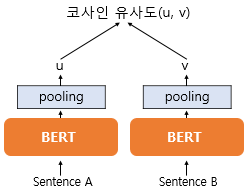

SOURCE : https://wikidocs.net/156176

2.문장 분류 태스크로 파인 튜닝
우선 문장 A와 문장 B 각각을 BERT의 입력으로 넣고, 앞서 BERT의 문장 임베딩을 얻기위한 방식이라고 언급했던 평균 풀링 또는 맥스 풀링을 통해서 각각에 대한 문장 임베딩 벡터를 얻습니다.

여기서는 이를 각각 u와 v라고 하였을 때, 그리고 나서 u벡터와 v벡터의 차이 벡터를 구합니다.

이 벡터는 수식으로 표현하면 |u-v|입니다. 그리고 이 세 가지 벡터를 연결(concatenation)합니다.

그리고 이 벡터를 출력층으로 보내 다중 클래스 분류합니다.

두 문장 임베딩 u와 v를 그 차이 ∣u−v∣와 concat해 3n 차원의 텐서를 만들고, 이를 가중치 W에 곱한다.

이를 softmax함수에 넣으면 k개 label에 대한 분류 작업이 가능해진다. loss는 cross-entropy로 설정했다.


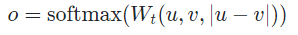


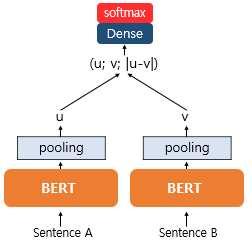

# Training Details
fine-tuning data

###SNLI

570,000 sentence pairs

labels: contradiction, entailment, neutral

###MNLI

430,000 sentence pairs

spoken and written text

batch size = 16

optimizer = Adam


learning rate = 2e-5


a linear learning rate warm-up over 10% of the training data


pooling strategy = MEAN

3.1 훈련 세부 사항
SBERT는 SNLI와 Multi-Genre NLI 데이터셋을 결합하여 훈련합니다. SNLI에는 contradiction, entailment, neutral과 같은 라벨이 달린 57만개의 문장 쌍이 있고, MultiNLI에는 43만개의 문장 쌍이 포함되어 다양한 장르의 말뭉치를 다룹니다. SBERT는 3-way softmax 분류기 목적 함수로 1 에포크 동안 미세 조정됩니다. 기본 pooling 전략은 평균 전략(MEAN-strategy)입니다.



### Unsupervied STS
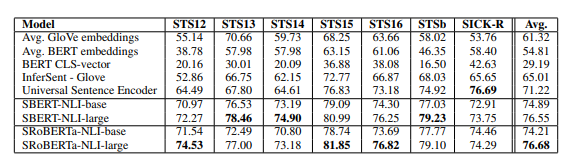

### Supervised STS
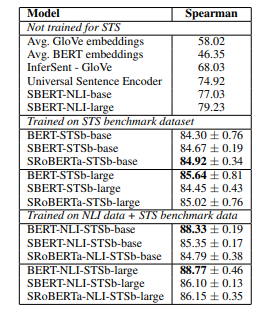

### Argument Facet Similarity
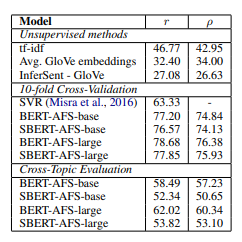

### Wikipedia Sections Distinction
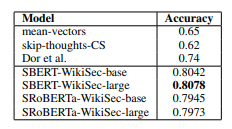

### Evaluation - SentEval
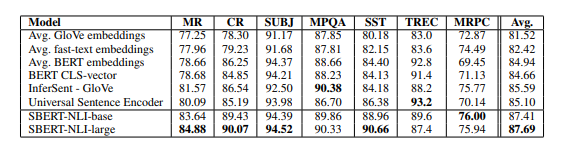

### Ablation Study

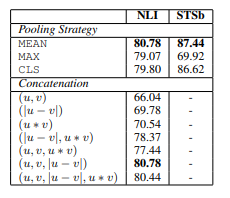

 Computational Efficiency

## 평가
STS(문장 유사성) 평가
STS 작업에서 SBERT의 성능을 평가합니다. 최첨단 방법들은 문장 임베딩을 유사도 점수로 매핑하는 (복잡한) 회귀 함수를 학습합니다. 하지만 이러한 회귀 함수는 이항적으로 작동하며 문장의 수가 증가하면 계산 양이 급격히 증가하므로 확장하기 어렵습니다. 대신, SBERT는 항상 코사인 유사도를 사용하여 두 문장 임베딩 간의 유사성을 비교합니다. 이를 통해 Unsupervised STS와 Supervised STS에서 성능이 향상되었습니다. 또한 AFS corpus에서도 성능을 평가했습니다.

중요한 실험 결과를 이해하기 위해 SBERT의 다양한 측면에 대한 Ablation Study를 수행했습니다. 다른 풀링 전략(MEAN, MAX, CLS)과 분류 목적 함수에 대한 다른 연결 방법을 평가하였으며, 각 구성에 대해 10개의 다른 랜덤 시드로 SBERT를 훈련하고 성능을 평균내었습니다.


# 결론


BERT는 기존의 유사성 측정 방법(cosine-similarity)과 맞지 않는 벡터 공간에 문장을 매핑하는 것으로 나타났으며, STS 태스크에서 평균 GloVe 임베딩의 성능보다 떨어졌습니다. SBERT는 이러한 문제점을 극복하고, siamese/triplet network 아키텍처에서 BERT를 fine-tuning하여 높은 품질의 문장 임베딩을 얻을 수 있었습니다

# 실습

In [1]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.4 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=0f31f5d51f7a2ea863c573f9bd404a5a2042b382d73ce78d68c50876feccc3e9
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173552e-02 -4.28515449e-02 -1.56286024e-02  1.40537303e-02
  3.95537727e-02  1.21796280e-01  2.94334106e-02 -3.17524187e-02
  3.54959629e-02 -7.93139935e-02  1.75878741e-02 -4.04369719e-02
  4.97259349e-02  2.54912246e-02 -7.18700588e-02  8.14968869e-02
  1.47069141e-03  4.79626991e-02 -4.50336412e-02 -9.92174670e-02
 -2.81769745e-02  6.45046085e-02  4.44670543e-02 -4.76217009e-02
 -3.52952331e-02  4.38671783e-02 -5.28566055e-02  4.33063833e-04
  1.01921506e-01  1.64072234e-02  3.26996595e-02 -3.45986746e-02
  1.21339476e-02  7.94870779e-02  4.58345609e-03  1.57777797e-02
 -9.68206208e-03  2.87625659e-02 -5.05805984e-02 -1.55793717e-02
 -2.87906546e-02 -9.62280575e-03  3.15556750e-02  2.27349028e-02
  8.71449187e-02 -3.85027491e-02 -8.84718448e-02 -8.75498448e-03
 -2.12343335e-02  2.08923239e-02 -9.02077407e-02 -5.25732562e-02
 -1.05638904e-02  2.88310610e-02 -1.61455162e-02  6.17837207e-03
 -1.23234

In [3]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

embedder = SentenceTransformer('all-MiniLM-L6-v2')

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.'
          ]
corpus_embeddings = embedder.encode(corpus)

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']

Cluster  2
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  3
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']

Cluster  4
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster  5
['The girl is carrying a baby.', 'The baby is carried by the woman']



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
